# Phase 1: ***Problem Understanding and Objective Definition***

**Objective of the Task**

The goal is to develop a machine learning classification system that can automatically identify fish diseases based on features extracted from fish images.
The task involves using supervised learning to classify fish into 10 disease categories, labeled as integers 0–9.

**Machine Learning Goal**

Design, train, evaluate, and compare machine learning models for fish disease classification.

Key tasks include:

- Building a Random Forest classifier
- Testing the model on unseen data
- Evaluating classification performance
- Applying dimensionality reduction or feature selection
- Comparing Random Forest with Decision Tree and KNN
- Analyzing results, performance trends, and class-wise behavior

**Expected Outputs**

- A trained Random Forest model saved as model_1.pkl
- A well-written report section containing:
   - methodology
   - results
   - interpretation
   - discussions
   - hyperparameter analysis

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

In [71]:
# Loading the dataset
df_train = pd.read_csv('fish_disease_train.csv')


In [72]:

display(df_train.head())

,Entropy,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,Average_R,Average_G,Average_B,Mean,Std Dev,Variance,Kurtosis,Skewness,Class
0,3.089044,103.484474,0.715319,0.751992,0.988201,3.525075,133.927888,134.124637,122.583450,36.333672,66.270070,4391.722207,3.987488,1.570458,9
1,0.173448,8.590868,0.988954,0.992453,0.976619,0.097429,189.096533,127.788239,71.194086,1.148008,13.838293,191.498341,166.917837,12.609277,3
2,0.444434,8.979343,0.963752,0.975923,0.951181,0.227418,42.653656,38.407018,39.996562,1.112086,9.721199,94.501712,143.855685,11.278587,1
3,0.308950,9.696244,0.977235,0.982782,0.976515,0.248347,72.558788,89.174254,93.234549,1.565753,14.237728,202.712904,125.096421,10.528541,0
4,0.892447,12.352270,0.926267,0.943913,0.989706,0.487507,89.285731,84.507989,77.357355,5.893133,24.603154,605.315202,24.686244,4.585030,0


In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7967 entries, 0 to 7966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entropy        7967 non-null   float64
 1   Contrast       7967 non-null   float64
 2   Energy         7967 non-null   float64
 3   Homogeneity    7967 non-null   float64
 4   Correlation    7967 non-null   float64
 5   Dissimilarity  7967 non-null   float64
 6   Average_R      7967 non-null   float64
 7   Average_G      7967 non-null   float64
 8   Average_B      7967 non-null   float64
 9   Mean           7967 non-null   float64
 10  Std Dev        7967 non-null   float64
 11  Variance       7967 non-null   float64
 12  Kurtosis       7967 non-null   float64
 13  Skewness       7967 non-null   float64
 14  Class          7967 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 933.8 KB


# Phase 2: ***EDA***

In [74]:
# The shape of the data

print(df_train.shape)

(7967, 15)


Has 7967 rows and 15 columns

In [75]:
# Data types

print(df_train.dtypes)

Entropy          float64
Contrast         float64
Energy           float64
Homogeneity      float64
Correlation      float64
Dissimilarity    float64
Average_R        float64
Average_G        float64
Average_B        float64
Mean             float64
Std Dev          float64
Variance         float64
Kurtosis         float64
Skewness         float64
Class              int64
dtype: object


Has All features are float and the class is int

In [76]:
# Checking for missing values

print(df_train.isnull().sum())

Entropy          0
Contrast         0
Energy           0
Homogeneity      0
Correlation      0
Dissimilarity    0
Average_R        0
Average_G        0
Average_B        0
Mean             0
Std Dev          0
Variance         0
Kurtosis         0
Skewness         0
Class            0
dtype: int64


The dataset has no missing values

Class distribution:
 Class
0     664
1    1086
2     852
3    1352
4     797
5     554
6     782
7     358
8     448
9    1074
Name: count, dtype: int64


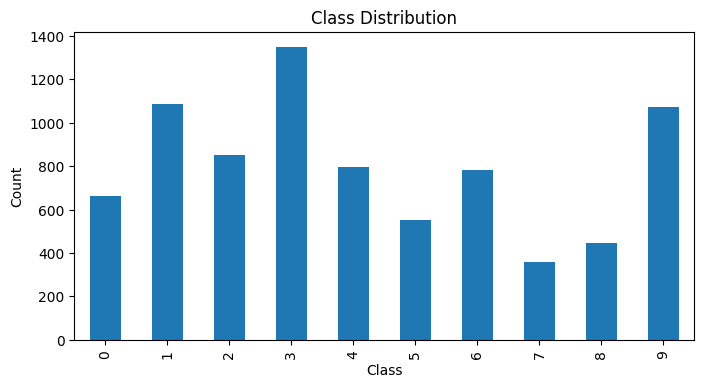

In [77]:
# checking the class distribution

# Class counts
class_counts = df_train['Class'].value_counts().sort_index()
print("Class distribution:\n", class_counts)

# Visualize as bar chart
plt.figure(figsize=(8, 4))
class_counts.plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


The dataset is not well balanced.

`Class 7` and `Class 8` have lowest smaples.

`Class 3` and `Class 1` have the highest samples.






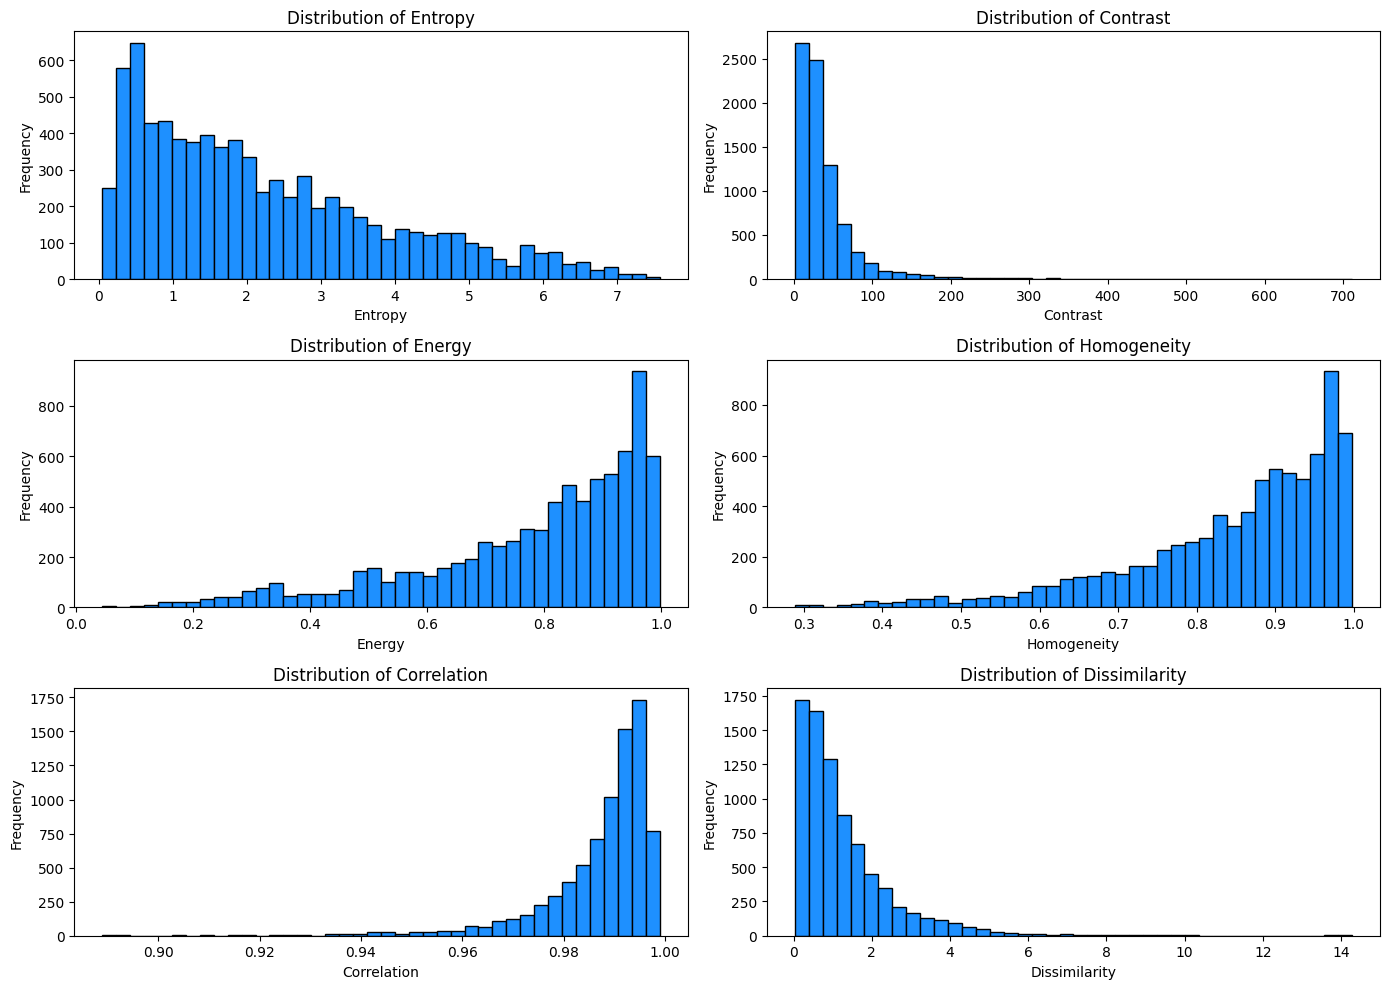

In [78]:
# Texture Feature Distribution

import matplotlib.pyplot as plt

texture_features = [
    'Entropy', 'Contrast', 'Energy', 
    'Homogeneity', 'Correlation', 'Dissimilarity'
]

plt.figure(figsize=(14, 10))
for i, col in enumerate(texture_features, 1):
    plt.subplot(3, 2, i)
    plt.hist(df_train[col], bins=40, color="dodgerblue", edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


These six features represent textural patterns extracted from fish images.
We visualize them together because they belong to the same feature family. and help identify disease-related structural variations.

*Interpretation*:
These skewed distributions may influence PCA and distance-based models; scaling will be required in preprocessing.

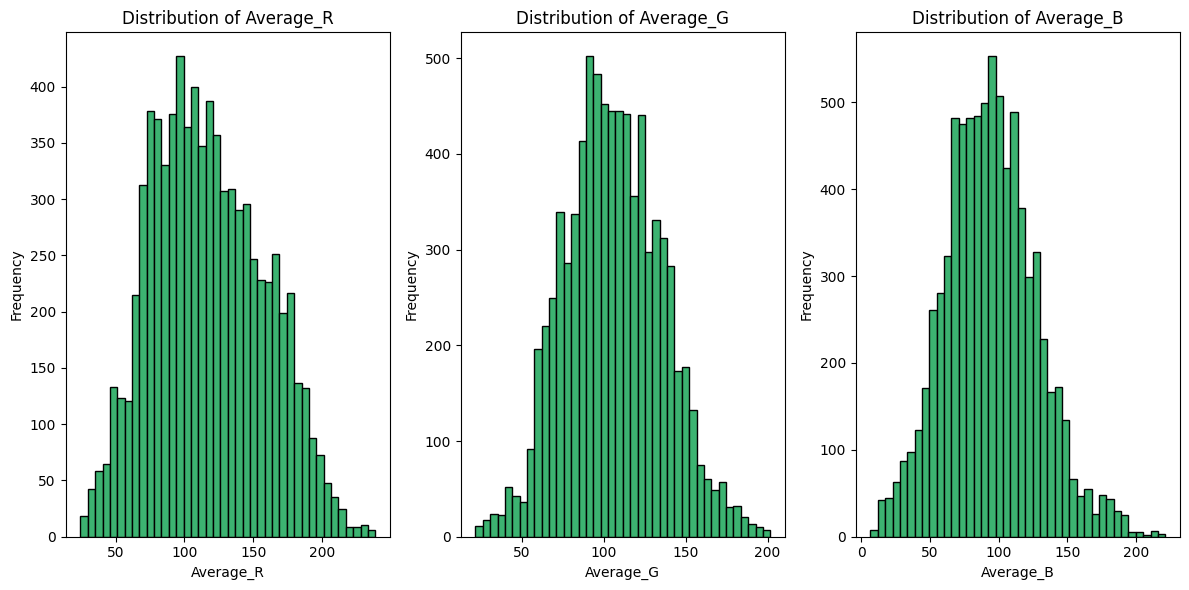

In [79]:
# Color feature distribution

color_features = ['Average_R', 'Average_G', 'Average_B']

plt.figure(figsize=(12, 6))
for i, col in enumerate(color_features, 1):
    plt.subplot(1, 3, i)
    plt.hist(df_train[col], bins=40, color="mediumseagreen", edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

These are features that represent the average pixel intensity values in the red, green, and blue channels of each fish image.

We analyze these color features together because:
- They belong to the same conceptual category (color descriptors)
- Their scales and meaning are directly comparable.
- They help identify discoloration patterns typical of fish diseases.

*Interpretation*: Color intensity varies across classes but is less skewed than texture features, making them stable inputs for most classifiers.

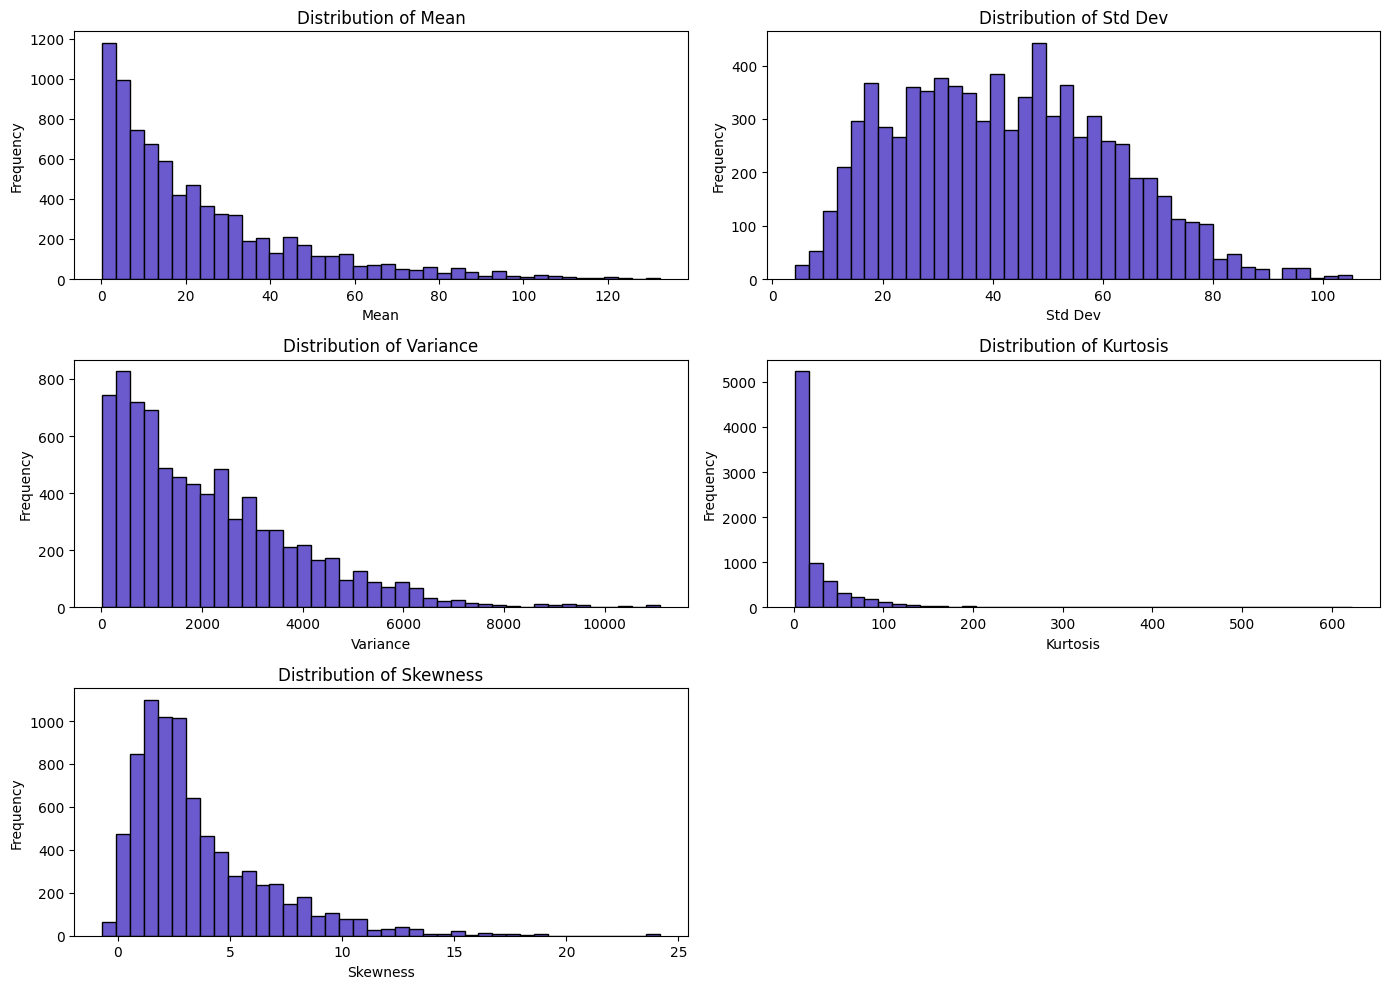

In [80]:
# Statistical Feature distribution

statistical_features = ['Mean', 'Std Dev', 'Variance', 'Kurtosis', 'Skewness']

plt.figure(figsize=(14, 10))
for i, col in enumerate(statistical_features, 1):
    plt.subplot(3, 2, i)
    plt.hist(df_train[col], bins=40, color="slateblue", edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

These features summarize the overall distribution shape, spread, and peakedness of pixel values, which may correlate with disease appearance. 

We evaluate these features together because:
- They are all statistical summaries of pixel intensity distributions.
- Their behaviors naturally complement one another.
- Grouping them improves readability and analytical structure.

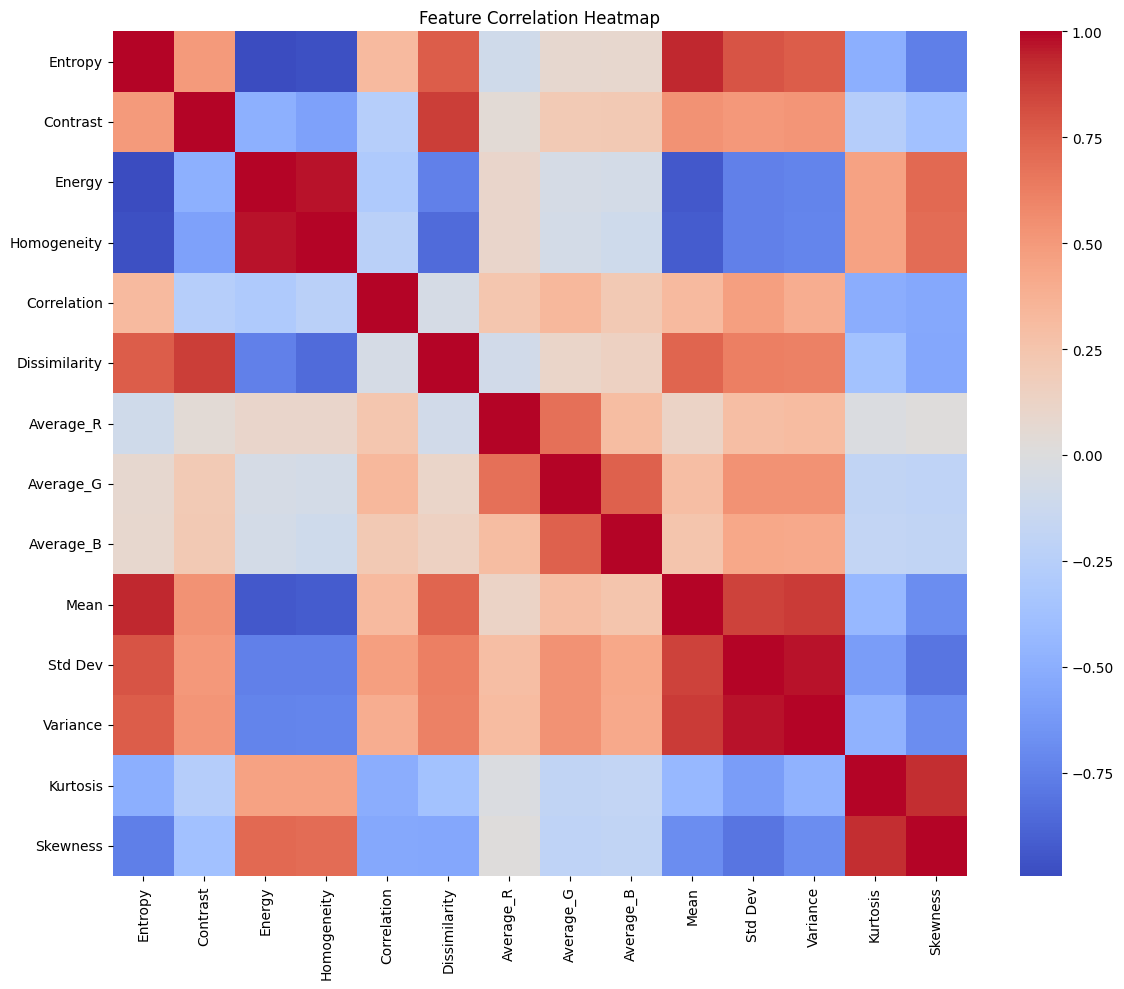

In [81]:
# Correlation heatmap

corr_matrix = df_train.drop(columns=['Class']).corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

Correlation analysis helps reveal how strongly features are related to each other.

This is especially important for this dataset because:
- Highly correlated features can negatively affect models like KNN and logistic regression.
- Strong correlations support the decision to apply dimensionality reduction.

We exclude the Class column from the feature correlation matrix because correlation is only meaningful between continuous features.

*Interpretation*: High feature redundancy supports the use of PCA or feature selection method.

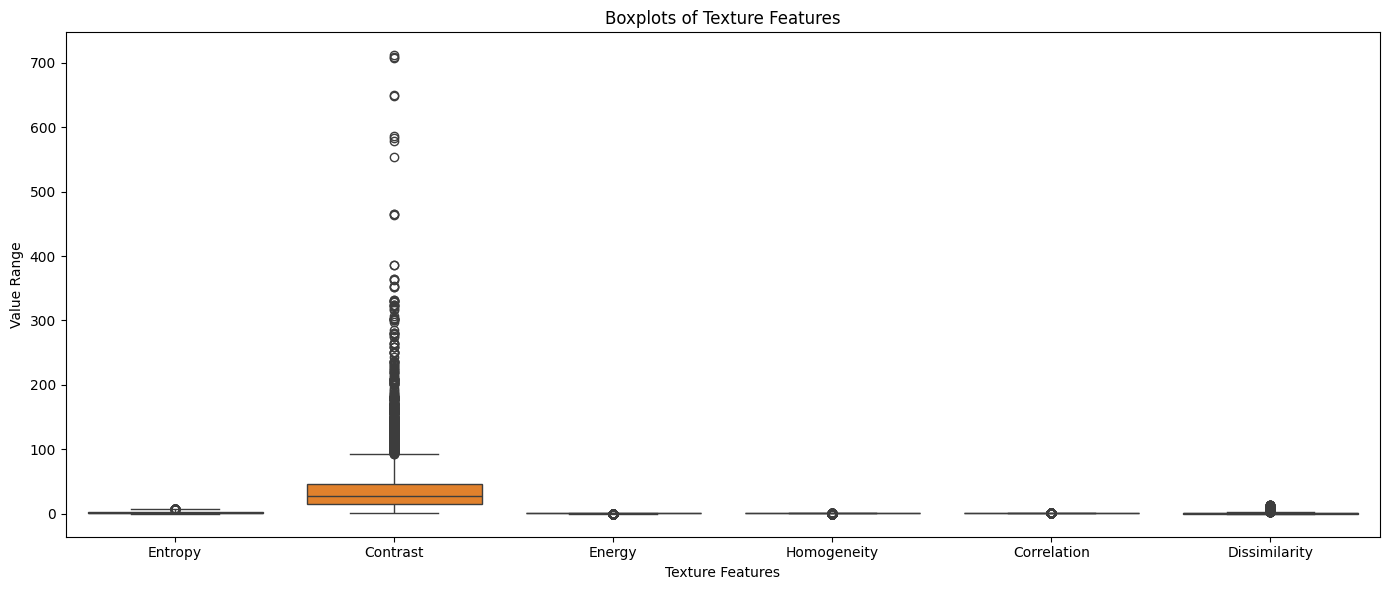

In [82]:
# Outlier detection for Texture features 

texture_features = [
    'Entropy', 'Contrast', 'Energy',
    'Homogeneity', 'Correlation', 'Dissimilarity'
]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_train[texture_features])
plt.title("Boxplots of Texture Features")
plt.xlabel("Texture Features")
plt.ylabel("Value Range")
plt.tight_layout()
plt.show()


Contrast displays a large number of extreme outliers.

Other texture features have narrow ranges with occasional outliers.

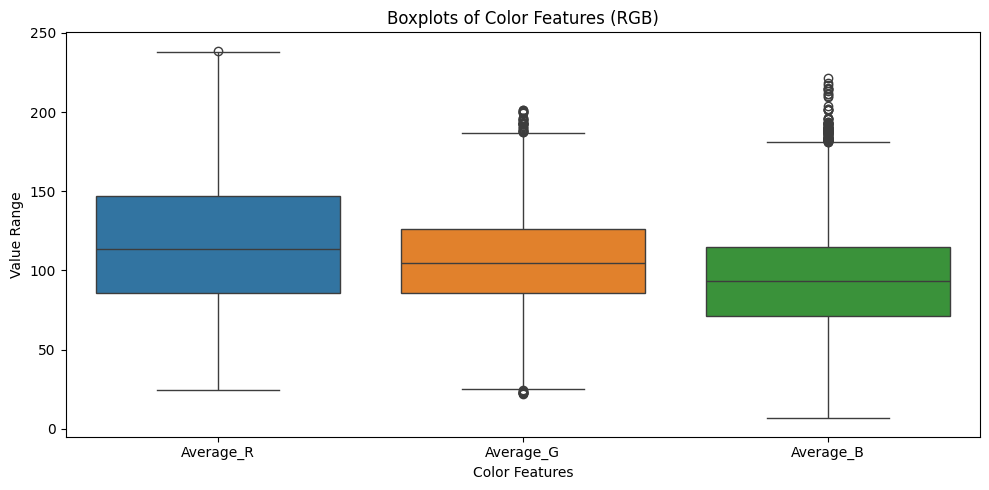

In [83]:
# Outlier detection for Color features 

color_features = ['Average_R', 'Average_G', 'Average_B']

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_train[color_features])
plt.title("Boxplots of Color Features (RGB)")
plt.xlabel("Color Features")
plt.ylabel("Value Range")
plt.tight_layout()
plt.show()

Values are generally well-contained with only a few outliers.

RGB channels have similar spread and range.

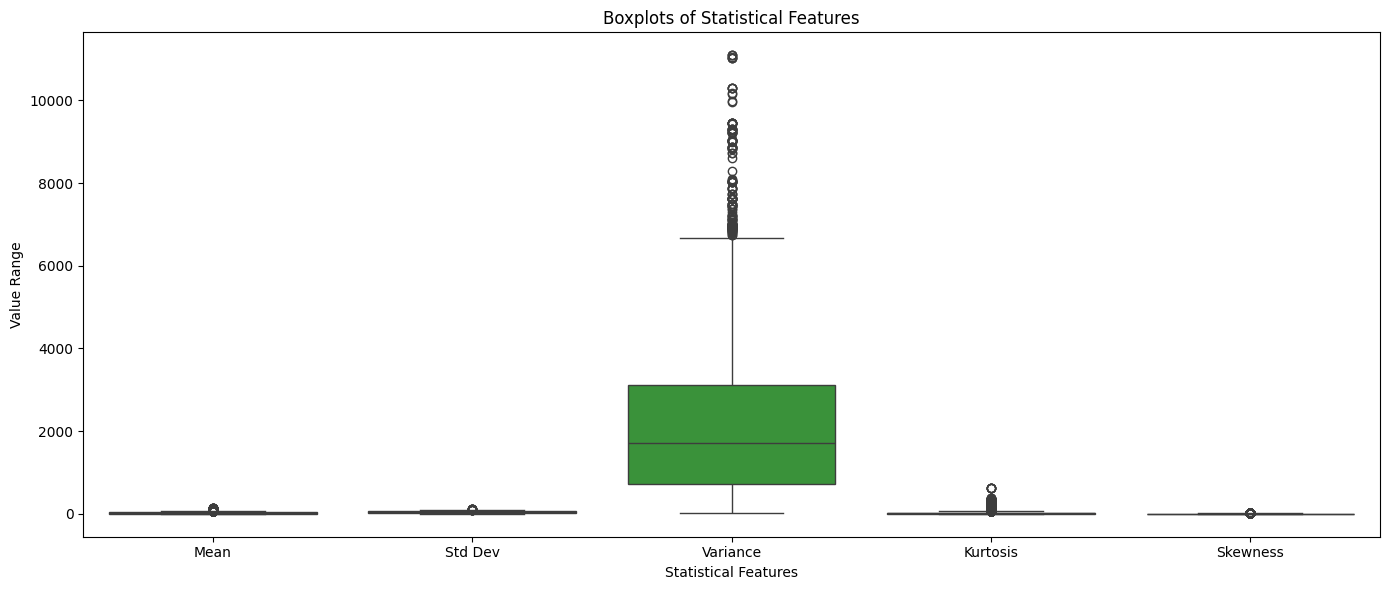

In [84]:
# Outlier detection for Statistical features

stat_features = ['Mean', 'Std Dev', 'Variance', 'Kurtosis', 'Skewness']

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_train[stat_features])
plt.title("Boxplots of Statistical Features")
plt.xlabel("Statistical Features")
plt.ylabel("Value Range")
plt.tight_layout()
plt.show()

Variance, Kurtosis, and Skewness show numerous extreme high outliers.

Mutual Information Scores:

Mean             1.754878
Skewness         1.623069
Kurtosis         1.603199
Variance         1.498232
Std Dev          1.498091
Entropy          0.703235
Energy           0.644764
Homogeneity      0.486973
Average_R        0.418750
Dissimilarity    0.403089
Correlation      0.353476
Contrast         0.267355
Average_B        0.252736
Average_G        0.240857
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_7028\1876624170.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")


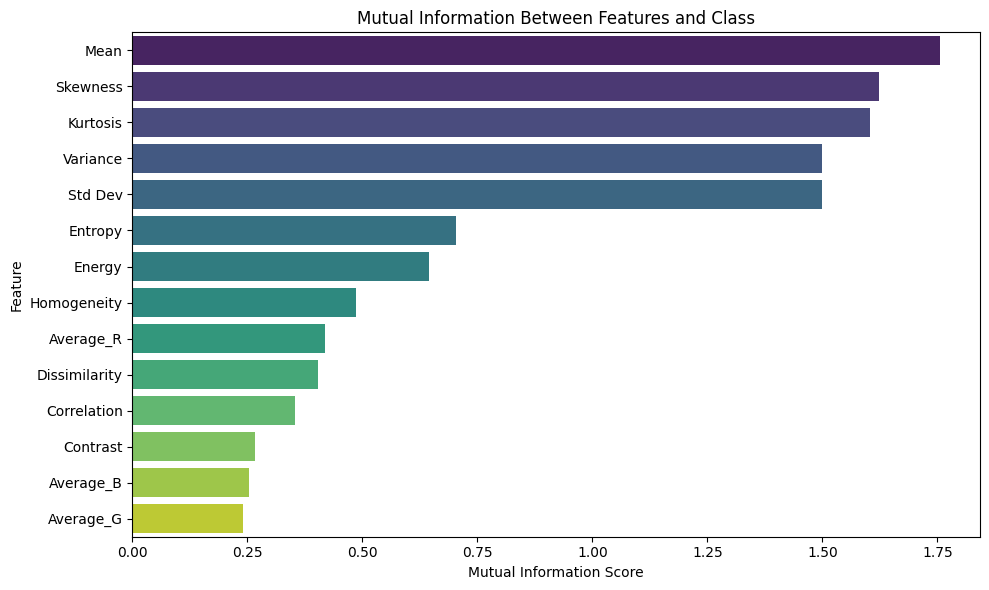

In [85]:
# Plotting the Mutual Infrormation of the features and the target variable

# Separate features and target
X = df_train.drop(columns=['Class'])
y = df_train['Class']

# Calculate Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Convert to a pandas Series for easier plotting
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display scores
print("Mutual Information Scores:\n")
print(mi_series)

# Plot MI scores
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")
plt.title("Mutual Information Between Features and Class")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Mutual Information (MI) measures the amount of shared information between each feature and the target variable (Class).

MI works well for capturing non-linear relationships between numerical and categorical variables

MI is computed here because it provides a more reliable measure of feature usefulness for classification than simple correlation.

Top informative features include:
- Mean
- Skewness
- Kurtosis
- Variance
- Std Dev

Texture and color features show lower MI scores.

# Phase 3: ***Preprocessing***

In [86]:
# Split Dataset into X (features) and y (target)

X = df_train.iloc[:, :-1]

y = df_train['Class']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (7967, 14)
y shape: (7967,)


In [87]:
# Fit StandardScaler on Training Features

scaler = StandardScaler()

scaler.fit(X)

print("Scaler fitted successfully.")

Scaler fitted successfully.


In [88]:
# Applying the tandardScaler to Create X_scaled

X_scaled = scaler.transform(X)

print("X_scaled shape:", X_scaled.shape)

X_scaled shape: (7967, 14)


***Handling Outliers***
- Tree-based models (Random Forest, Decision Tree) are naturally robust to outliers.
- Outliers in image-derived features may correspond to legitimate disease characteristics, such as severe lesions or abnormal intensities.
- Removing outliers may degrade model interpretability and reduce diagnostic information.
- Maintaining outliers ensures a fair comparison between baseline RF and PCA-based models

*Conclusion*: The Outliers will be retained.

In [89]:
# Prepare X_original and X_scaled for the Modeling

X_original = X.copy()

X_scaled = scaler.transform(X)

print("X_original shape:", X_original.shape)
print("X_scaled shape:", X_scaled.shape)

X_original shape: (7967, 14)
X_scaled shape: (7967, 14)


`X_original`: Contains the raw, unscaled features exactly as provided in fish_disease_train.csv.

`X_scaled`: Contains standardized features transformed using the fitted StandardScaler.

# Phase 4: ***Random Forest Baseline***

In [90]:
rf_baseline = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

rf_baseline

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

The baseline hyperparameters are chosen to provide a reasonably strong model while keeping training time efficient:

- n_estimators = 200 —> a larger number of trees generally improves stability.
- max_depth = None —> allows trees to grow fully, letting the model capture complex patterns.
- min_samples_split = 2 —> standard value for baseline.
- n_jobs = -1 —> uses all CPU cores for faster training

In [91]:
#  Setting up the cross-validation

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

skf

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

StratifiedKFold is used to preserve the class distribution in each fold.

k = 5 folds —> a common trade-off between stability of estimates and computational cost.

shuffle = True and random_state = 42 —> to randomize the data order while keeping the results reproducible.

This cross-validation strategy is applied on the training data only (X_original, y) to estimate the baseline performance of the Random Forest classifier before evaluating on the held-out test set.

In [92]:
# Performing the k-fold Cross validation

rf_baseline = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

# Stratified 5-fold CV (from Task 4.2)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision_macro": make_scorer(precision_score, average="macro"),
    "recall_macro": make_scorer(recall_score, average="macro"),
    "f1_macro": make_scorer(f1_score, average="macro")
}

# Perform cross-validation
cv_results = cross_validate(
    rf_baseline,
    X, y,
    cv=skf,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

# Display average CV results
print("CV Accuracy: ", cv_results["test_accuracy"].mean())
print("CV Precision: ", cv_results["test_precision_macro"].mean())
print("CV Recall: ", cv_results["test_recall_macro"].mean())
print("CV F1-score: ", cv_results["test_f1_macro"].mean())

CV Accuracy:  0.9692487758157748
CV Precision:  0.972281413329168
CV Recall:  0.9710829831852376
CV F1-score:  0.9714425241674389


In [93]:
# Training the final Baseline model

rf_baseline.fit(X, y)

print("Final Random Forest model trained on full training set.")

Final Random Forest model trained on full training set.


In [94]:
import pickle

# Save the trained model
with open("model_1.pkl", "wb") as f:
    pickle.dump(rf_baseline, f)

print("Model saved successfully as model_1.pkl.")


Model saved successfully as model_1.pkl.


The baseline Random Forest model was configured with the following hyperparameters:

- n_estimators = 200 —> number of trees in the forest; chosen to improve stability without causing excessive training time.

- max_depth = None —> allows each tree to grow until all leaves are pure or contain fewer than the minimum samples; this lets the model capture complex non-linear relationships.

- min_samples_split = 2 —> default value, allowing splits as long as at least two samples are present.

- n_jobs = -1 —> uses all available CPU cores to speed up training.

- random_state = 42 —> ensures reproducible results.

# Phase 5: ***Baseline RF on Test Data***

In [95]:
# Loading the trained model

with open("model_1.pkl", "rb") as f:
    rf_loaded = pickle.load(f)

print("Model loaded successfully from model_1.pkl.")

Model loaded successfully from model_1.pkl.


In [96]:
# Loading the test dataset

test_df = pd.read_csv("fish_disease_test.csv")

print("Test data shape:", test_df.shape)
test_df.head()

Test data shape: (1992, 15)


,Entropy,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,Average_R,Average_G,Average_B,Mean,Std Dev,Variance,Kurtosis,Skewness,Class
0,1.641048,21.298954,0.854724,0.894968,0.994461,0.784524,109.993684,117.165172,111.432118,15.950725,43.696867,1909.416164,8.954655,2.671629,4
1,3.099377,88.727301,0.707088,0.756780,0.987271,3.321886,84.990475,122.717125,129.802428,31.644975,57.647066,3323.184177,4.044150,1.582447,6
2,0.574078,34.292270,0.954305,0.964812,0.973375,0.573066,120.523451,115.437871,82.574920,4.157231,25.250791,637.602431,46.907995,6.543108,0
3,3.304441,38.349288,0.656647,0.735265,0.989352,2.065927,80.950848,82.453702,70.690308,26.877375,42.294806,1788.850621,3.658278,1.304047,9
4,7.050150,27.358681,0.148409,0.441300,0.996397,2.850451,104.090945,98.557915,94.759278,84.314692,61.898421,3831.414561,2.567890,0.524374,4


In [97]:
# Split Test Data into X_test and y_test

X_test = test_df.iloc[:, :-1]
y_test = test_df['Class']        

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1992, 14)
y_test shape: (1992,)


In [98]:
# Generate Predictions on Test Data

y_pred = rf_loaded.predict(X_test)

print("Predictions generated on test data.")


Predictions generated on test data.


Test Accuracy: 0.9774096385542169
Test Precision: 0.9761927107096267
Test Recall: 0.9806825061509846
Test F1-score: 0.9783314932223665

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       155
           1       0.98      0.96      0.97       300
           2       1.00      1.00      1.00       208
           3       0.97      0.96      0.97       316
           4       1.00      1.00      1.00       223
           5       0.95      0.96      0.95       132
           6       0.99      0.97      0.98       191
           7       1.00      1.00      1.00       102
           8       0.96      1.00      0.98       119
           9       0.98      0.97      0.98       246

    accuracy                           0.98      1992
   macro avg       0.98      0.98      0.98      1992
weighted avg       0.98      0.98      0.98      1992



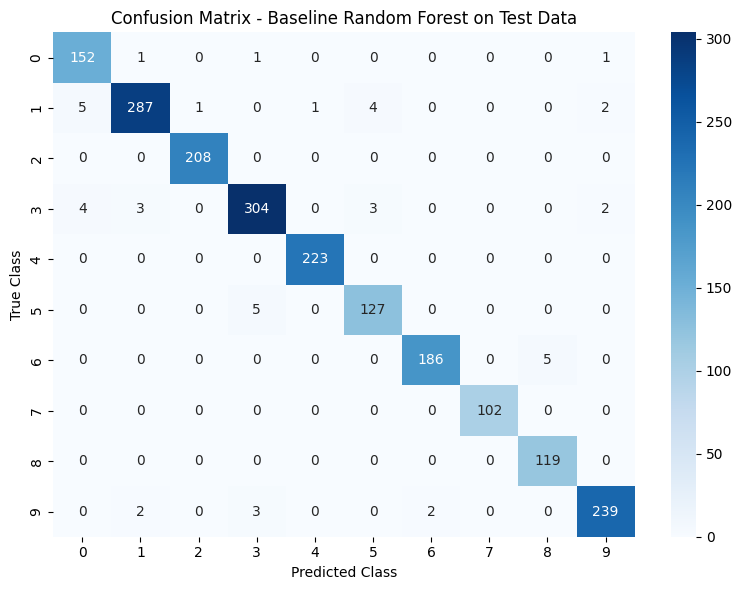

In [99]:
# Evaluate Accuracy, Precision, Recall, F1 on Test Data

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average="macro")
test_recall = recall_score(y_test, y_pred, average="macro")
test_f1 = f1_score(y_test, y_pred, average="macro")

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-score:", test_f1)

# Optional: Detailed per-class report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Baseline Random Forest on Test Data")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.tight_layout()
plt.show()

*High accuracy(97.7%)*: Model correctly predicts most disease classes.

*High macro precision & recall (~97–98%)*: Macro averaging treats all classes equally, even minority ones show excellent performance across the board.

*Confusion matrix*

The confusion matrix shows that the Random Forest classifier performs extremely well across all ten fish disease classes.

- Classes 2, 4, 7, 8, and 9 achieved near-perfect classification, with almost zero misclassifications.

- Class 1 shows small confusion with classes 0, 2, 5, and 9 (all <6 samples), but recall remains very high (0.96).

- Class 3 has a few misclassifications (predicted as 0, 1, or 9), but maintains strong overall performance.

- Class 5 shows the most spread-out errors, being occasionally misclassified into classes 2 or 3. This explains its slightly lower F1-score (0.95).

- No class suffers from severe confusion, indicating the model is well-calibrated and able to distinguish subtle feature differences between disease categories.

Overall, the confusion matrix confirms that the Random Forest model generalizes well across all disease classes, with only minor misclassification patterns.

# Phase 6: ***Preparing PCA RF model***


Principal Component Analysis (PCA) transforms the original features into a smaller set of orthogonal components that capture the maximum variance in the data.

In [100]:
# Fitting the PCA to the scaled data

pca = PCA(n_components=0.95)   # keep 95% of the variance
pca.fit(X_scaled)

# Number of components selected
n_components = pca.n_components_
n_components

6

PCA successfully compressed your 14 original features down to 6, while still preserving 95% of the variance in the dataset.

This stronger compression:

- Removes redundant information

- Speeds up model training

- Reduces noise

- Maintains almost all predictive power

In [101]:
#Transform training data

X_pca = pca.transform(X_scaled)

print("Transformed PCA training set shape:", X_pca.shape)


Transformed PCA training set shape: (7967, 6)


In [102]:
# Training Random Forest on PCA-Reduced Training Data

rf_pca = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

rf_pca.fit(X_pca, y)

print("PCA-based Random Forest trained successfully.")


PCA-based Random Forest trained successfully.


A second Random Forest classifier was trained using the PCA-transformed training dataset (X_pca).

This model allows comparison between the baseline Random Forest (trained on 14 raw features) and a reduced version (trained on 6 PCA components).

The same hyperparameters as the baseline model were used to ensure a fair comparison.

In [103]:
# Scale and PCA transform the test data

# Scale test data using TRAINING scaler
X_test_scaled = scaler.transform(X_test)

# Apply PCA transformation using PCA model
X_test_pca = pca.transform(X_test_scaled)

print("Test data transformed using scaler and PCA.")
print("X_test_pca shape:", X_test_pca.shape)

Test data transformed using scaler and PCA.
X_test_pca shape: (1992, 6)


In [104]:
# Evaluting the PCA-RF model

y_pred_pca = rf_pca.predict(X_test_pca)

# Compute metrics
pca_accuracy = accuracy_score(y_test, y_pred_pca)
pca_precision = precision_score(y_test, y_pred_pca, average="macro")
pca_recall = recall_score(y_test, y_pred_pca, average="macro")
pca_f1 = f1_score(y_test, y_pred_pca, average="macro")

print("PCA-RF Test Accuracy:", pca_accuracy)
print("PCA-RF Test Precision:", pca_precision)
print("PCA-RF Test Recall:", pca_recall)
print("PCA-RF Test F1-score:", pca_f1)

PCA-RF Test Accuracy: 0.927710843373494
PCA-RF Test Precision: 0.9312858130373144
PCA-RF Test Recall: 0.9372829933830698
PCA-RF Test F1-score: 0.9338005725379924


The PCA-based model achieves good performance but lower than the baseline in all metrics.

The drop in accuracy (~5%) indicates that some discriminative information was lost when reducing from 14 features to 6 components.

The PCA model is computationally more efficient and suitable when dimensionality reduction is required, even though the baseline model remains superior in predictive accuracy.

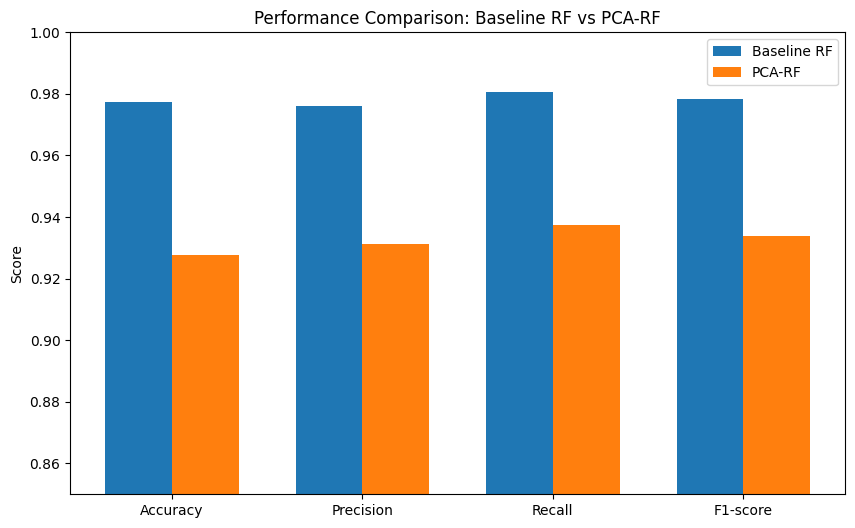

In [105]:
# Comparison Plot

metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

baseline_scores = [
    0.9774,   # accuracy
    0.9762,   # precision
    0.9807,   # recall
    0.9783    # f1
]

pca_scores = [
    0.9277,   # accuracy
    0.9313,   # precision
    0.9373,   # recall
    0.9338    # f1
]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, baseline_scores, width, label='Baseline RF')
plt.bar(x + width/2, pca_scores, width, label='PCA-RF')

plt.ylabel('Score')
plt.title('Performance Comparison: Baseline RF vs PCA-RF')
plt.xticks(x, metrics)
plt.ylim(0.85, 1.0)
plt.legend()

plt.show()

The Baseline model has better performance across all the  metrics 

# Phase 7: ***Model Comparison***


Models to Compare on Test Data

- Random Forest (baseline)

- Decision Tree

- KNN

In [ ]:
# Decision Tree model

dt_model = DecisionTreeClassifier(
    random_state=42
)

dt_model

DecisionTreeClassifier(random_state=42)

In [109]:
# KNN model

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski',
    p=2
)

knn_model

KNeighborsClassifier()

In [ ]:
# Decision Tree and KNN assigning

X_train_dt = X_original
X_test_dt = X_test


X_train_knn = X_scaled
X_test_knn = X_test_scaled

print("Dataset assignment completed for Decision Tree and KNN.")

Dataset assignment completed for Decision Tree and KNN.


Decision Tree does not require feature scaling, so it is trained using the unscaled feature matrix (X_original) and evaluated using the raw test features (X_test).

KNN is a distance-based model and therefore requires standardized inputs. It is trained using the scaled training matrix (X_scaled) and evaluated using the scaled test matrix (X_test_scaled).

In [111]:
# Training the decision tree

dt_model.fit(X_train_dt, y)

print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


In [112]:
# Training the KNN model

knn_model.fit(X_train_knn, y)

print("KNN model trained successfully.")

KNN model trained successfully.


In [113]:
# Predicting for both models on the Test Data

y_pred_dt = dt_model.predict(X_test_dt)

y_pred_knn = knn_model.predict(X_test_knn)

print("Predictions generated for Decision Tree and KNN.")

Predictions generated for Decision Tree and KNN.


In [115]:

# ----- Decision Tree Metrics -----
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average="macro")
dt_recall = recall_score(y_test, y_pred_dt, average="macro")
dt_f1 = f1_score(y_test, y_pred_dt, average="macro")

print("Decision Tree Metrics:")
print("  Accuracy:", dt_accuracy)
print("  Precision:", dt_precision)
print("  Recall:", dt_recall)
print("  F1-score:", dt_f1)
print("\n")

# ----- KNN Metrics -----
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average="macro")
knn_recall = recall_score(y_test, y_pred_knn, average="macro")
knn_f1 = f1_score(y_test, y_pred_knn, average="macro")

print("KNN Metrics:")
print("  Accuracy:", knn_accuracy)
print("  Precision:", knn_precision)
print("  Recall:", knn_recall)
print("  F1-score:", knn_f1)


Decision Tree Metrics:
  Accuracy: 0.8860441767068273
  Precision: 0.8848372161866169
  Recall: 0.8936129055927532
  F1-score: 0.8888308736580333


KNN Metrics:
  Accuracy: 0.8865461847389559
  Precision: 0.8909601645826506
  Recall: 0.9033413001151374
  F1-score: 0.8943275556441328


*Computing the ROC-AUC*

In [118]:
# Binarize true labels for multiclass ROC-AUC
y_test_binarized = label_binarize(y_test, classes=sorted(y.unique()))

# ----- Random Forest ROC-AUC -----
rf_probs = rf_loaded.predict_proba(X_test)
rf_auc = roc_auc_score(y_test_binarized, rf_probs, multi_class="ovr", average="macro")

# ----- Decision Tree ROC-AUC -----
dt_probs = dt_model.predict_proba(X_test_dt)
dt_auc = roc_auc_score(y_test_binarized, dt_probs, multi_class="ovr", average="macro")

# ----- KNN ROC-AUC -----
knn_probs = knn_model.predict_proba(X_test_knn)
knn_auc = roc_auc_score(y_test_binarized, knn_probs, multi_class="ovr", average="macro")

print("ROC-AUC Scores:")
print("  Random Forest AUC:", rf_auc)
print("  Decision Tree AUC:", dt_auc)
print("  KNN AUC:", knn_auc)

ROC-AUC Scores:
  Random Forest AUC: 0.9996570825442774
  Decision Tree AUC: 0.9403842038873016
  KNN AUC: 0.9887513378929628


These values clearly show:

- Random Forest delivers near-perfect class separability

- KNN performs surprisingly well

- Decision Tree is weaker but still reasonable

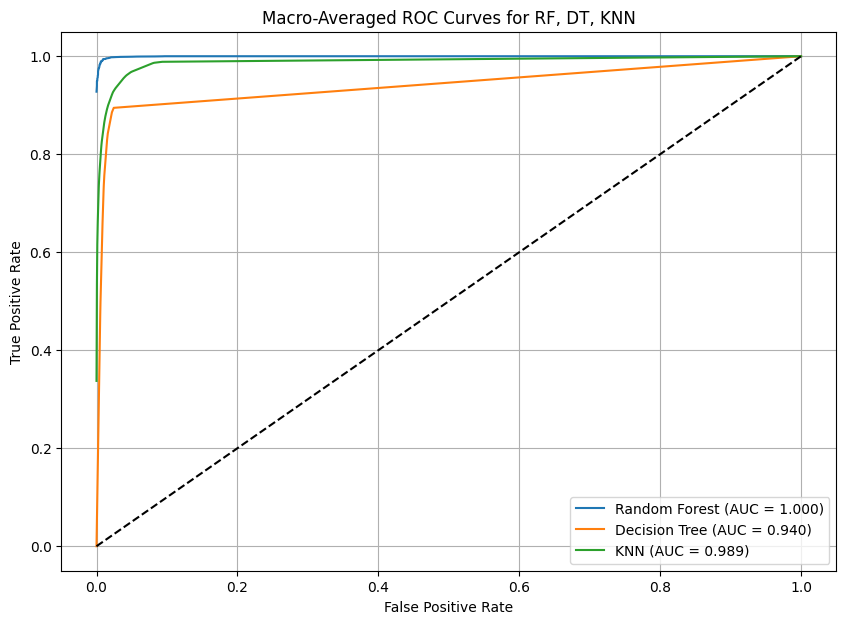

In [120]:
# Plotting the ROC Curves

y_bin = y_test_binarized
n_classes = y_bin.shape[1]

# Store model probabilities
model_probs = {
    "Random Forest": rf_probs,
    "Decision Tree": dt_probs,
    "KNN": knn_probs
}

plt.figure(figsize=(10, 7))

# Compute macro ROC curve for each model
for name, probs in model_probs.items():
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Compute ROC curve per class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Macro-average ROC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    macro_auc = auc(all_fpr, mean_tpr)

    plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {macro_auc:.3f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-Averaged ROC Curves for RF, DT, KNN")
plt.legend()
plt.grid(True)
plt.show()

The ROC curve for the Random Forest lies almost entirely at the top-left corner. This indicates near-perfect separability between all classes, meaning RF can strongly distinguish one disease class from another.


KNN shows a very high ROC curve, close to the Random Forest but slightly lower. The model has strong class discriminative ability, benefiting from standardized features.

The Decision Tree curve is visibly lower and less steep than RF and KNN. Indicates weaker separability across the ten classes.

*Summary*

The ROC curves clearly show that Random Forest provides the strongest class discrimination, followed by KNN, while the Decision Tree performs the weakest.
The large gap between RF and DT demonstrates the benefit of ensemble methods in complex multiclass problems.

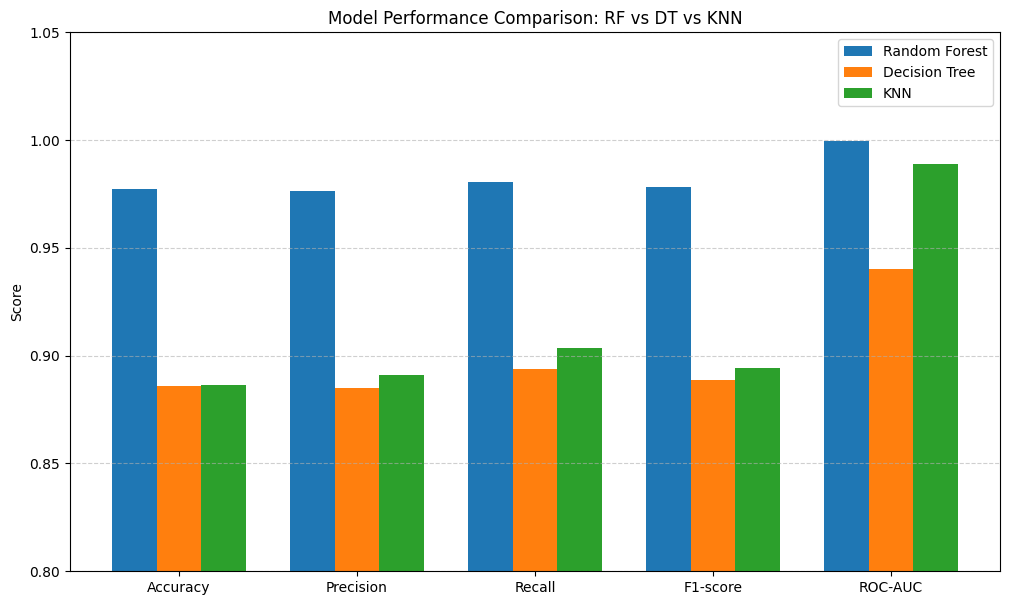

In [122]:
# Metric visualisation

metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

rf_scores = [
    0.9774,   # accuracy
    0.9762,   # precision
    0.9807,   # recall
    0.9783,   # f1
    rf_auc    # roc-auc
]

dt_scores = [
    dt_accuracy,
    dt_precision,
    dt_recall,
    dt_f1,
    dt_auc
]

knn_scores = [
    knn_accuracy,
    knn_precision,
    knn_recall,
    knn_f1,
    knn_auc
]

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(12, 7))

plt.bar(x - width, rf_scores, width, label="Random Forest")
plt.bar(x, dt_scores, width, label="Decision Tree")
plt.bar(x + width, knn_scores, width, label="KNN")

plt.ylabel("Score")
plt.title("Model Performance Comparison: RF vs DT vs KNN")
plt.xticks(x, metrics)
plt.ylim(0.80, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

RF leads in all metrics, with very high scores above 0.97 in accuracy, precision, recall, and F1.

Its ROC-AUC is nearly 1.0, confirming excellent separability.

This shows RF is the most reliable and stable model for this dataset.

KNN consistently outperforms the Decision Tree in all metrics.

DT scores are clustered around 0.88–0.89 for most metrics.

*Summary*

The Random Forest model outperforms both the Decision Tree and KNN across all evaluation metrics.
KNN delivers strong and stable performance after scaling, making it the second-best model.
The Decision Tree performs significantly worse, confirming that single-tree models are less suitable for complex multiclass classification compared to ensemble and distance-based methods.

### **Conclusion for Question 1**

The Random Forest classifier demonstrated the best overall performance for fish disease classification, achieving an accuracy of **97.7%**, a macro F1-score of **97.8%**, and a near-perfect ROC-AUC of **0.9997**. These results show excellent class separability and strong generalization across all ten disease classes.

Applying PCA reduced the feature space to 6 components and improved computational efficiency, but resulted in lower performance (F1-score ≈ **93.4%**) compared to the baseline model, indicating that some useful information was lost during dimensionality reduction.

In comparison with other classifiers, **KNN** performed moderately well after scaling (F1-score ≈ **89.4%**, ROC-AUC ≈ **0.989**), while the **Decision Tree** showed the weakest performance (F1-score ≈ **88.8%**, ROC-AUC ≈ **0.940**). This highlights the advantage of ensemble methods over single-tree and distance-based models for this dataset.

Overall, the Random Forest is the most effective and reliable model for this classification task.
